In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
# Using plotly.express
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.width',None)

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('seaborn')

<Figure size 640x480 with 0 Axes>

In [38]:
sales_data = pd.read_csv("data/sales_by_dept.csv")
sales_data.Date = pd.to_datetime(sales_data.Date)
# sales_data = sales_data.sort_values(by = "Date")
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [67]:
q = """
    Select A.Store, COUNT(DEPT) AS No_of_dept
    FROM
    (SELECT
        Store, DEPT
     FROM
        sales_data
     GROUP BY
        Store, Dept) A
    GROUP BY
        A.Store
    ORDER BY
        No_of_dept DESC
        """

store_no_of_dept = pysqldf(q)
store_no_of_dept.head()

,Store,No_of_dept
0,13,79
1,15,79
2,19,79
3,2,78
4,4,78


In [65]:
q = """SELECT
        Store, DEPT, COUNT(DEPT) as No_sold_per_dept
     FROM
        sales_data
     GROUP BY
        Store, Dept
    ORDER BY
        No_sold_per_dept DESC
        """

store_dept_no_of_sold_per_dept = pysqldf(q)
store_dept_no_of_sold_per_dept.head()

,Store,Dept,No_sold_per_dept
0,1,1,143
1,1,2,143
2,1,3,143
3,1,4,143
4,1,5,143


In [119]:
q = """SELECT
        Store, Dept, AVG(Weekly_Sales) as Avg_weekly_sales_per_dept
     FROM
        sales_data
     GROUP BY
        Store, Dept
    ORDER BY
        Avg_weekly_sales_per_dept DESC
        """

store_dept_avg_weekly_sale_per_dept = pysqldf(q)
store_dept_avg_weekly_sale_per_dept.head()

,Store,Dept,Avg_weekly_sales_per_dept
0,14,92,182527.956014
1,2,92,164840.230979
2,20,92,164633.741538
3,13,92,162034.099301
4,4,92,159365.107902


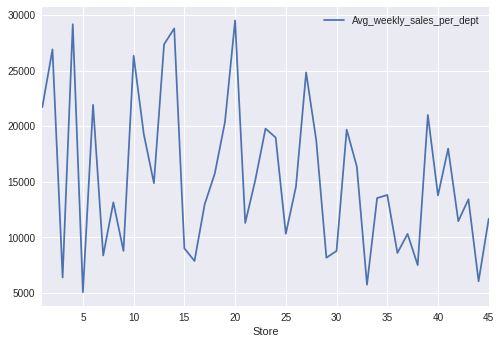

In [118]:
q = """SELECT
        Store, AVG(Weekly_Sales) as Avg_weekly_sales_per_dept
     FROM
        sales_data
     GROUP BY
        Store
    ORDER BY
        Store DESC
        """

store_avg_weekly_sale_per_dept = pysqldf(q)
store_avg_weekly_sale_per_dept.head()
store_avg_weekly_sale_per_dept.index = store_dept_avg_weekly_sale_per_dept.Store
del store_avg_weekly_sale_per_dept['Store']
store_avg_weekly_sale_per_dept.plot()

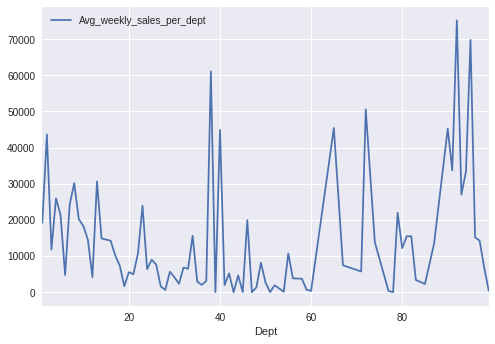

In [120]:
q = """SELECT
        DEPT, AVG(Weekly_Sales) as Avg_weekly_sales_per_dept
     FROM
        sales_data
     GROUP BY
        Dept
    ORDER BY
        Dept DESC
        """

dept_avg_weekly_sale_per_dept = pysqldf(q)
dept_avg_weekly_sale_per_dept.index = dept_avg_weekly_sale_per_dept.Dept
del dept_avg_weekly_sale_per_dept['Dept']
dept_avg_weekly_sale_per_dept.plot()